In [1]:
import matplotlib.pyplot as plt

import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Nov  6 2022 20:23:54

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Create two neurons with different input currents
neuron1 = nest.Create('iaf_psc_alpha')
neuron2 = nest.Create('iaf_psc_alpha')

In [3]:
# Create excitatory and inhibitory poisson spike generators
noise_ex = nest.Create('poisson_generator')
noise_in = nest.Create('poisson_generator')
noise_ex.set(rate=80000.0)
noise_in.set(rate=15000.0)

In [4]:
# Create a multimeter to record membrane potential of both neurons
multimeter = nest.Create('multimeter')
multimeter.set({'record_from':['V_m']})

In [5]:
# Connect poisson spike trains to neuron1
syn_dict_ex = {'weight': 1.2}
syn_dict_in = {'weight': -2.0}
nest.Connect(noise_ex, neuron1, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron1, syn_spec=syn_dict_in)

In [6]:
# Connect neuron1 to neuron2 and the multimeter to both neurons
nest.Connect(neuron1, neuron2, syn_spec={'weight':20.0, 'delay':1.0})
nest.Connect(multimeter, neuron1)
nest.Connect(multimeter, neuron2)

# Simulate for 1000 ms
nest.Simulate(1000.0)


Jan 25 17:47:18 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Jan 25 17:47:18 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Jan 25 17:47:18 SimulationManager::run [Info]: 
    Simulation finished.


In [7]:
# Reat output data from the multimeter and separate membrane potentials from the timesteps
data = multimeter.get('events')

Vm = data['V_m']
t = data['times']

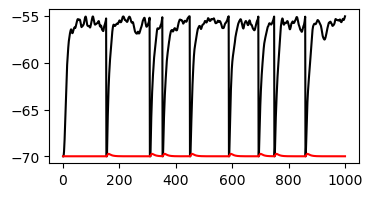

In [8]:
# Plot membrane potentials of both neurons
fig,ax = plt.subplots(1,1, figsize=(4,2))
ax.plot(t[::2], Vm[::2], c='black')
ax.plot(t[1::2], Vm[1::2], c='red')
plt.show()